# Implementation du Modele de Regression Lineaire Simple from Scratch

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

## Création d'un Jeu de Données

In [5]:
np.random.seed(0) # <-- Permet de fixer l'aleatoire pour obtenir les meme données lors d'une future utilisation
x = np.random.randn(150, 1)
y = x + np.random.randn(150, 1) / 2

In [7]:
x.shape

(150, 1)

In [9]:
y.shape

(150, 1)

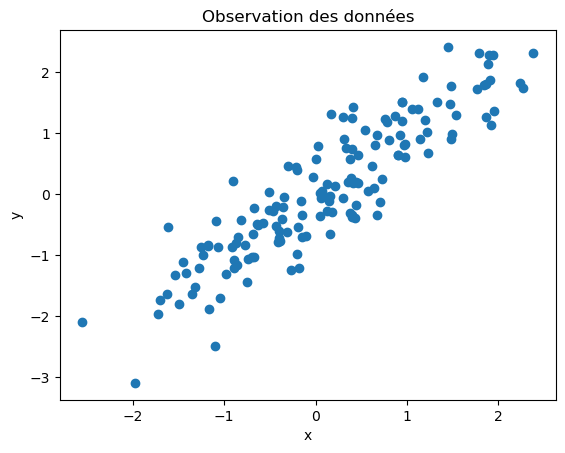

In [11]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données")
plt.show()

In [13]:
X = np.hstack((x, np.ones((150, 1)))) # <--- Matrice données + bias
X[:4, :]

array([[1.76405235, 1.        ],
       [0.40015721, 1.        ],
       [0.97873798, 1.        ],
       [2.2408932 , 1.        ]])

In [15]:
theta = np.random.randn(2, 1) # <-- Vecteur parametre

## Definition du Modele : F = X.theta

In [18]:
def modele(X, theta):
    return X.dot(theta)

## Definition de la fonction cout 

In [21]:
def cost_function(X, theta, y):
    predition = modele(X, theta)
    erreurs = predition - y
    return erreurs.mean(axis=0) / 2

## fonction Gradient 

In [24]:
def gradient_function(X, theta, y):
    m = len(y)
    return X.T.dot(modele(X, theta) - y) / m

## Algoritme de gradient descent

In [27]:
def gradient_descent(X, theta, y, alpha = 0.01, nbr_itterations=200, precision = 0):
    history = []
    for i in range(nbr_itterations):
        history.append(cost_function(X, theta, y))
        theta_precedent = theta
        theta = theta - alpha * gradient_function(X, theta, y)
        if(0 < precision < 1):
            norm_vectuer = (theta - theta_precedent)**2
            norm = (norm_vectuer.sum(axis=0)) ** 0.5
            if(norm <= precision):
                return theta, history
    return theta, history

## Presentation du modele avant entrainement Avec le jeu des données

In [30]:
x_m = np.linspace(-3, 3, 50).reshape((50, 1))
f = modele(np.hstack((x_m, np.ones((50, 1)))), theta)

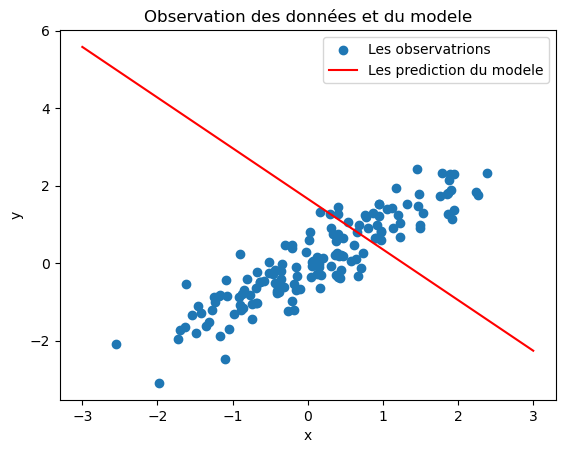

In [32]:
plt.figure()
plt.scatter(x, y, label='Les observatrions')
plt.plot(x_m, f, c='r', label='Les prediction du modele')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données et du modele")
plt.legend()
plt.show()

## Presentation du modele apres l'entrainement Avec le jeu des données

Entrainement du modele

In [36]:
theta, history = gradient_descent(X, theta, y, alpha=0.05, nbr_itterations=500)

Representation

In [39]:
f = modele(np.hstack((x_m, np.ones((50, 1)))), theta)

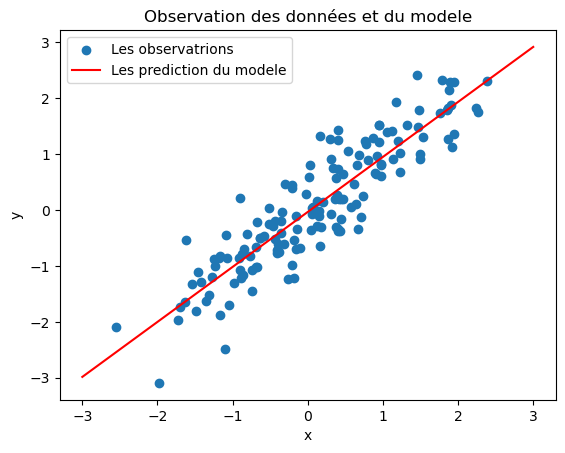

In [41]:
plt.figure()
plt.scatter(x, y, label='Les observatrions')
plt.plot(x_m, f, c='r', label='Les prediction du modele')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Observation des données et du modele")
plt.legend()
plt.show()

## Courbe d'apprentissage : Les eurreurs du modele a chaque iteration

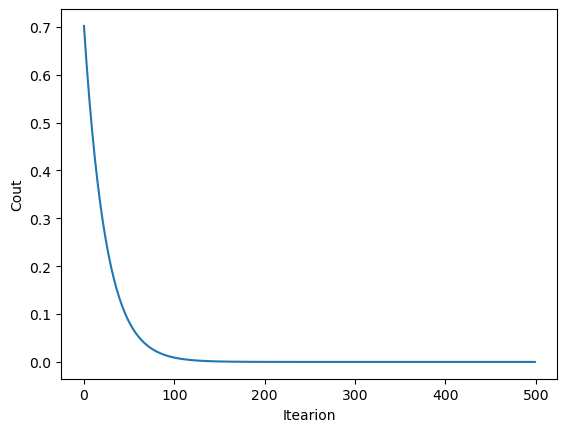

In [44]:
iterations = np.arange(0, len(history))
plt.figure()
plt.plot(iterations, history)
plt.xlabel('Itearion')
plt.ylabel('Cout')
plt.show()

D'apres la courbe d'apprentissage à partir de l'itération 200 le modele n' apprend plus car le cout ne diminue plus !!
On peut meme arreter l'apprentissage a ce niveau !!

## La performance du modele en utilisant le coefficient de determination

In [48]:
def model_precision(X, theta, y): 
    num = (y - modele(X, theta)) ** 2
    deno = (y - y.mean(axis=0))**2
    return (1 - (num.sum(axis=0) / deno.sum(axis=0)))[0]

In [50]:
print(f"La performance du modèle est de : {model_precision(X, theta, y)* 100:.2f} %")

La performance du modèle est de : 81.06 %


# Implementation du Modele de Regression Lineaire Simple En utilisant Scikit-Learn

In [53]:
from sklearn.linear_model import SGDRegressor

Chargement du modele

In [56]:
model = SGDRegressor(max_iter=200, eta0=0.05)
model

SGDRegressor(eta0=0.05, max_iter=200)

Entrainement du modele

In [59]:
model.fit(x, y.ravel())

SGDRegressor(eta0=0.05, max_iter=200)

Representation du modele avec le jeu de données

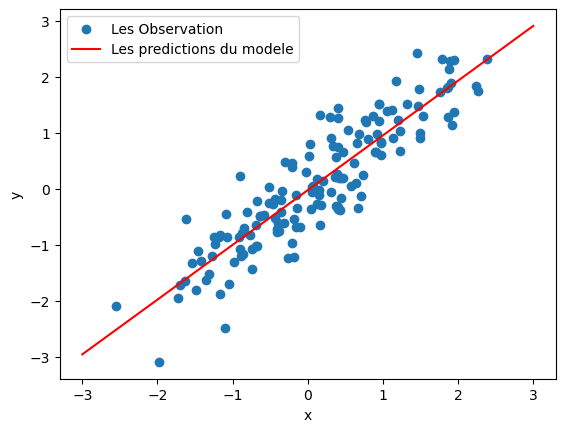

In [62]:
f = model.predict(x_m)
plt.figure()
plt.scatter(x, y, label='Les Observation')
plt.plot(x_m, f, c='r',label='Les predictions du modele')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [64]:
print(f"La performance du modèle est de : {model.score(x, y) * 100:.2f} %")

La performance du modèle est de : 81.05 %


# On remarque bien que on a eu la même performance from Scratch que avec Scikit-Learn 

# Bonne pratique pour entrainner un modele de Machine Learning

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, median_absolute_error
from sklearn.pipeline import make_pipeline

Definir la pipeline

In [71]:
pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=200, eta0=0.05))
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(eta0=0.05, max_iter=200))])

Definition des diferrent combinaison pour les parametres

In [74]:
scoring = {
    'R2': 'r2',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MEAE': 'neg_median_absolute_error'
}
param_grid = {
    'standardscaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

Preparation des données du train set et du test set pour le modele

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Definittion de GridSearhCV

In [80]:
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, refit='R2', cv=5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor',
                                        SGDRegressor(eta0=0.05,
                                                     max_iter=200))]),
             param_grid={'standardscaler': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MEAE': 'neg_median_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [82]:
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor',
                                        SGDRegressor(eta0=0.05,
                                                     max_iter=200))]),
             param_grid={'standardscaler': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MEAE': 'neg_median_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [84]:
grid.best_params_

{'standardscaler': 'passthrough'}

In [86]:
grid.best_score_

0.779400499458144

In [88]:
model = grid.best_estimator_
model

Pipeline(steps=[('standardscaler', 'passthrough'),
                ('sgdregressor', SGDRegressor(eta0=0.05, max_iter=200))])

passthrough veut dire qu'aucun transformer ne applique avant de passer les donées au modele

In [100]:
print(f"La performance du modèle est de : {model.score(X_test, y_test) * 100:.2f} %")

La performance du modèle est de : 82.30 %
